In [95]:
from testing_criterions import CPTDigraphManager
from diblob import DigraphManager


def extract_k_test_cases(test_cases, delimiter = '|', artificial_source='S', artificial_sink='T'):
    test_case_str = f"s{delimiter}"
    test_case_list = []
    
    for elem in test_cases:
        if elem[1] == artificial_sink:
            test_case_list.append(test_case_str[:-1])
            test_case_str = f"s{delimiter}"
        elif not set(elem).intersection({artificial_sink, artificial_source}):
            test_case_str += f"{elem[1]}{delimiter}"

    return test_case_list

<span style="font-size: 22px;">Structure created by algorithm for different cases:</span>

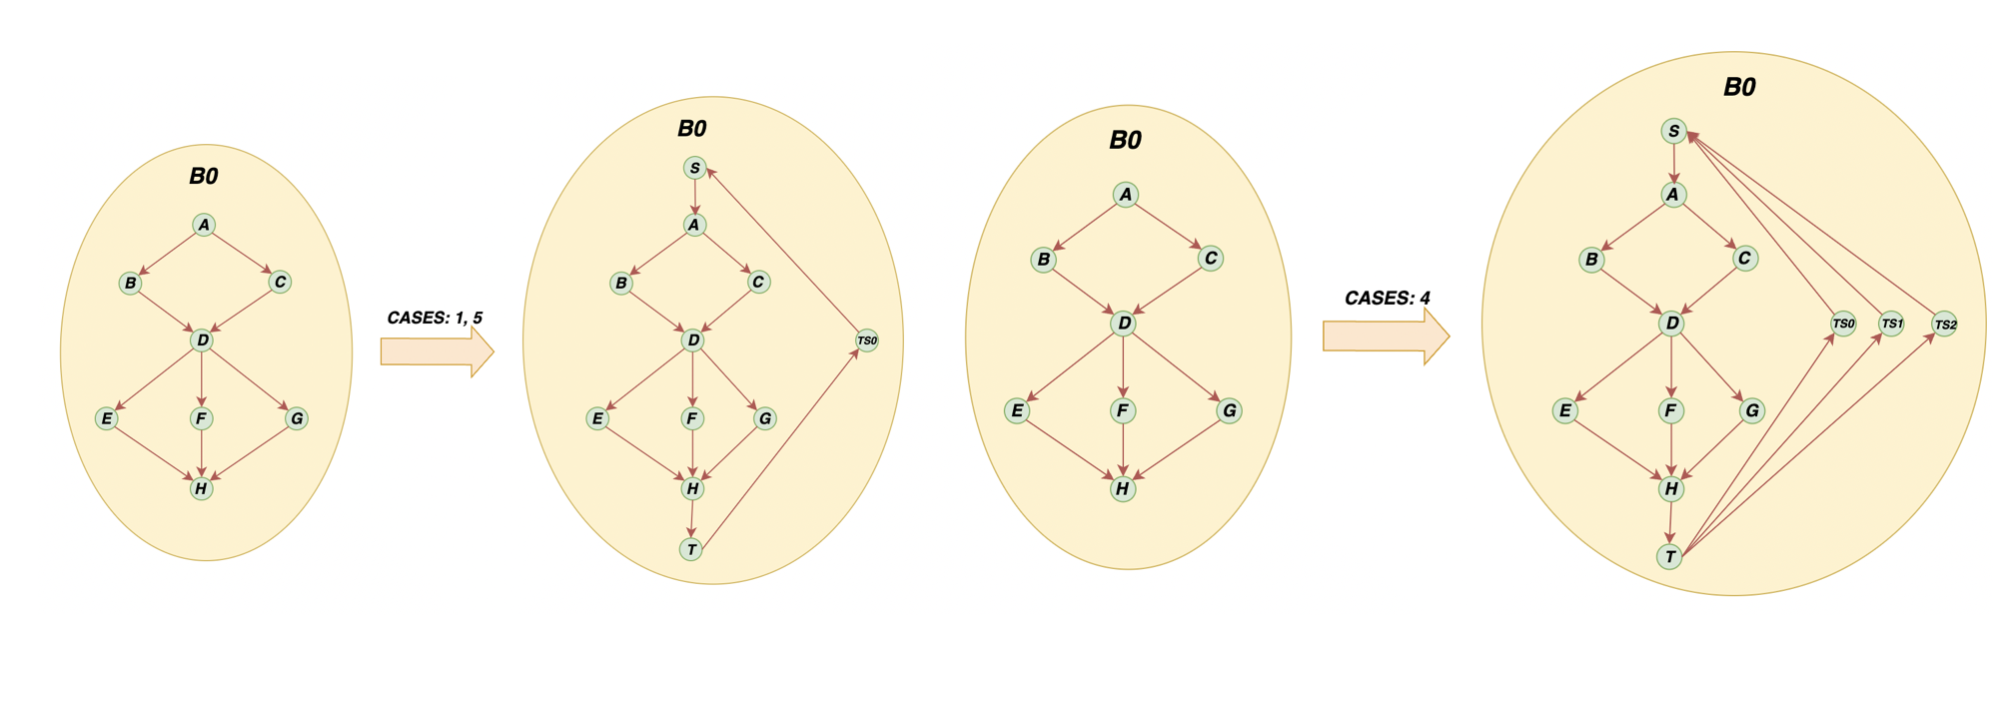

In [96]:
def generate_test_cases(digraph_manager, 
                        source='S', 
                        sink='T', 
                        cost_function={}, 
                        additional_edge_cost=2, 
                        default_cost=1,
                        k=1, 
                        delimiter=','):
    
    if source in digraph_manager or sink in digraph_manager:
        raise Exception('sink/source should be unique over digraph namespace!')
    
    dict_json_representation = dict(digraph_manager(digraph_manager.root_diblob_id))
    cpt = CPTDigraphManager(dict_json_representation, cost_function={})

    minimal_elements, maximal_elements = cpt.get_edge_elements()
    
    nodes_to_add = [sink + source + str(number) for number in range(k)] + [sink, source]
    cpt.add_nodes(*nodes_to_add)

    minimal_edges = [(source, node_id) for node_id in minimal_elements]
    maximal_edges = [(node_id, sink) for node_id in maximal_elements]

    if not minimal_edges or not maximal_edges:
        raise Exception('Should be at least minimal/maximal element in the diblob!')
    
    sink_source_edges = [(sink, sink + source + str(number)) for number in range(k)] +\
                        [(sink + source + str(number), source) for number in range(k)]
    
    
    new_edges = minimal_edges + maximal_edges + sink_source_edges
    cpt.connect_nodes(*new_edges)

    cost_function_update_dict = {edge_id: cost_function.get(edge_id, 1)*default_cost
                                 for edge_id in cpt.edges}

    for number in range(k):
        cost_function_update_dict[(sink, sink + source + str(number))] = additional_edge_cost
        cost_function_update_dict[(sink + source + str(number), source)] = additional_edge_cost

    cpt.update_cost_function(cost_function_update_dict)

    cpt, cost = cpt.compute_cpt(start_node=source)

    return extract_k_test_cases(cpt, delimiter, source, sink), cost - 2*k*(additional_edge_cost + 1)


In [97]:
cpt_digraph_manager = DigraphManager({"B0": {}})
cpt_digraph_manager.add_nodes('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I')
cpt_digraph_manager.connect_nodes(('A', 'C'), ('B', 'C'), ('C', 'D'), ('C', 'E'), ('C', 'F'),
                       ('D', 'I'), ('D', 'G'), ('E', 'G'), ('E', 'H'), ('F', 'H'))
                       

# Case 5
number_of_nodes = len(cpt_digraph_manager.nodes)
weight = number_of_nodes * (number_of_nodes + 1) / 2

test_cases, cost = generate_test_cases(digraph_manager=cpt_digraph_manager,
                                       default_cost=weight)
print("Case 5: Minimal total cost (any number of test cases)")
print(f"{test_cases=}")
print(f"{cost=}\n")

Case 5: Minimal total cost (any number of test cases)
test_cases=['s,C,F,H', 's,C,E,H', 's,C,D,G', 's,C,D,I', 's,C,E,G']
cost=1139.0



In [12]:
cpt2_digraph_manager = DigraphManager({"B0": {}})
cpt2_digraph_manager.add_nodes('A', 'B', 'C', 'D', 'E', 'F', 'G')
cpt2_digraph_manager.connect_nodes(('A', 'B'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'),
                       ('D', 'F'), ('E', 'F'), ('F', 'B'), ('F', 'G'))

# Case 1
weight = number_of_nodes * (number_of_nodes + 1) / 2

test_cases, cost = generate_test_cases(digraph_manager=cpt2_digraph_manager,
                                       default_cost=weight,
                                       additional_edge_cost=weight**3)
print("Case 1: Minimal total number of test cases (without cost)")
print(f"{test_cases=}")
print(f"{cost=}\n")

test_cases, cost = generate_test_cases(digraph_manager=cpt2_digraph_manager,
                                       default_cost=weight,
                                       cost_function={('F', 'B'): 20})
print("Case 5: Minimal total cost (any number of test cases)")
print(f"{test_cases=}")
print(f"{cost=}\n")

Case 1: Minimal total number of test cases (without cost)
test_cases=['SA,B,C,F,B,D,F,B,E,F,G,T']
cost=182790.0

Case 5: Minimal total cost (any number of test cases)
test_cases=['SA,B,C,F,G,T', 'S,A,B,D,F,B,E,F,G,T']
cost=1538.0



In [5]:

cpt3_digraph_manager = DigraphManager({"B0": {}})
cpt3_digraph_manager.add_nodes('A', 'B', 'C', 'D', 'E', 'F', 'G')
cpt3_digraph_manager.connect_nodes(('A', 'B'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'),
                       ('D', 'F'), ('E', 'F'), ('F', 'G'))

# Case 3
K=5
test_cases, cost = generate_test_cases(digraph_manager=cpt2_digraph_manager,
                                       default_cost=weight,
                                       additional_edge_cost=(weight*K)**2,
                                       k=K)

print("Case 4: Set number of test cases")
print(f"{test_cases=}")
print(f"{cost=}\n")

Case 4: Set number of test cases
test_cases=['SA,B,C,F,G,T', 'S,A,B,E,F,G,T', 'S,A,B,E,F,G,T', 'S,A,B,E,F,G,T', 'S,A,B,D,F,B,E,F,G,T']
cost=507735.0



In [98]:
#Example from diblob application

cpt4_digraph_manager = DigraphManager({
"B0": {
    "A": [{"SSC_1": ["C1", "B1"]}, {"SSC_3": ["C3", "A3", "B3", "D3"]}],
    "SSC_3": {
        "C3": ["D3", {"DAG": ["D"]}],
        "A3": ["B3", "C3", {"DAG": ["D"]}],
        "B3": ["C3", {"DAG": ["D"]}],
        "D3": ["A3", {"DAG": ["D"]}],
    },
    "F": [],
    "E": [],
    "D": ["E", "F"],
    "SSC_1": {
        "SSC_2": {
            "A2": ["B2", {"SSC_1": ["B1"]}],
            "C2": ["D2", {"SSC_1": ["B1"]}],
            "D2": ["A2", {"SSC_1": ["B1"]}],
            "B2": ["C2", {"SSC_1": ["B1"]}],
        },
        "C1": [{"SSC_2": ["A2", "C2", "D2", "B2"]}, {"DAG": ["D"]}],
        "B1": ["C1", {"DAG": ["D"]}],
    },
},
})
cpt4_digraph_manager.flatten('SSC_2', 'SSC_1', 'SSC_3')
weight = (number_of_nodes + 1) * (number_of_nodes) / 2

test_cases, cost = generate_test_cases(digraph_manager=cpt4_digraph_manager,
                                       default_cost=weight,
                                       additional_edge_cost=1)
print("Case 1: Minimal total number of test cases (without cost)")
print(f"{test_cases=}")
print(f"{cost=}")
print(f"number of tests: {len(test_cases)}\n")

test_cases, cost = generate_test_cases(digraph_manager=cpt4_digraph_manager,
                                       default_cost=weight,
                                       cost_function={('6', '2'): 70})
print("Case 5: Minimal total cost (any number of test cases)")
print(f"{test_cases=}")
print(f"{cost=}")
print(f"number of tests: {len(test_cases)}\n")

K=7
weight = (number_of_nodes + K + 1) * (number_of_nodes + K) / 2
test_cases, cost = generate_test_cases(digraph_manager=cpt4_digraph_manager,
                                       default_cost=1,
                                       additional_edge_cost=weight**2,
                                       k=K)

print("Case 4: Set number of test cases")
print(f"{test_cases=}")
print(f"{cost=}")
print(f"number of test == K: {len(test_cases)}\n")

Case 1: Minimal total number of test cases (without cost)
test_cases=['s,A3,C3,D3,A3,B3,C3,D3,A3,D,E', 's,D3,D,E', 's,B1,C1,B2,C2,D2,A2,B2,B1,C1,D2,B1,C1,A2,B1,C1,C2,B1,D,E', 's,C1,D,E', 's,B3,D,F', 's,C3,D,E']
cost=2393.0
number of tests: 6

Case 5: Minimal total cost (any number of test cases)
test_cases=['s,A3,C3,D3,A3,B3,C3,D3,A3,D,E', 's,D3,D,E', 's,B1,C1,B2,C2,D2,A2,B2,B1,C1,D2,B1,C1,A2,B1,C1,C2,B1,D,E', 's,C1,D,E', 's,B3,D,F', 's,C3,D,E']
cost=2403.0
number of tests: 6

Case 4: Set number of test cases
test_cases=['s,A3,C3,D,E', 's,A3,B3,C3,D3,A3,D,E', 's,D3,D,E', 's,B1,C1,B2,C2,D2,A2,B2,B1,C1,D2,B1,C1,A2,B1,C1,C2,B1,D,E', 's,C1,D,E', 's,B3,D,F', 's,C3,D,E']
cost=42.0
number of test == K: 7



{'(120, 130)': ['0.037', '0.031', '0.034', '0.034', '0.034', '0.071', '0.032', '0.040', '0.027', '0.034', '0.027', '0.028', '0.037', '0.031', '0.034', '0.037', '0.038', '0.029', '0.032', '0.042', '0.050', '0.030', '0.043', '0.032', '0.035', '0.052', '0.045', '0.046', '0.046', '0.039', '0.038', '0.036', '0.043', '0.036', '0.042', '0.050', '0.030', '0.035', '0.036', '0.039', '0.026', '0.041', '0.032', '0.031', '0.039', '0.028', '0.036', '0.030', '0.029', '0.029', '0.031', '0.031', '0.029', '0.029', '0.033', '0.031', '0.042', '0.029', '0.037', '0.059', '0.045', '0.053', '0.038', '0.048', '0.044', '0.074', '0.048', '0.049', '0.039', '0.047', '0.043', '0.038', '0.037', '0.059', '0.051', '0.039', '0.030', '0.036', '0.035', '0.035', '0.033', '0.035', '0.040', '0.038', '0.045', '0.029', '0.029', '0.027', '0.031', '0.040', '0.027', '0.043', '0.031', '0.038', '0.034', '0.035', '0.045', '0.034', '0.043', '0.027'], '(120, 131)': ['0.038', '0.035', '0.040', '0.035', '0.042', '0.060', '0.037', '0.05

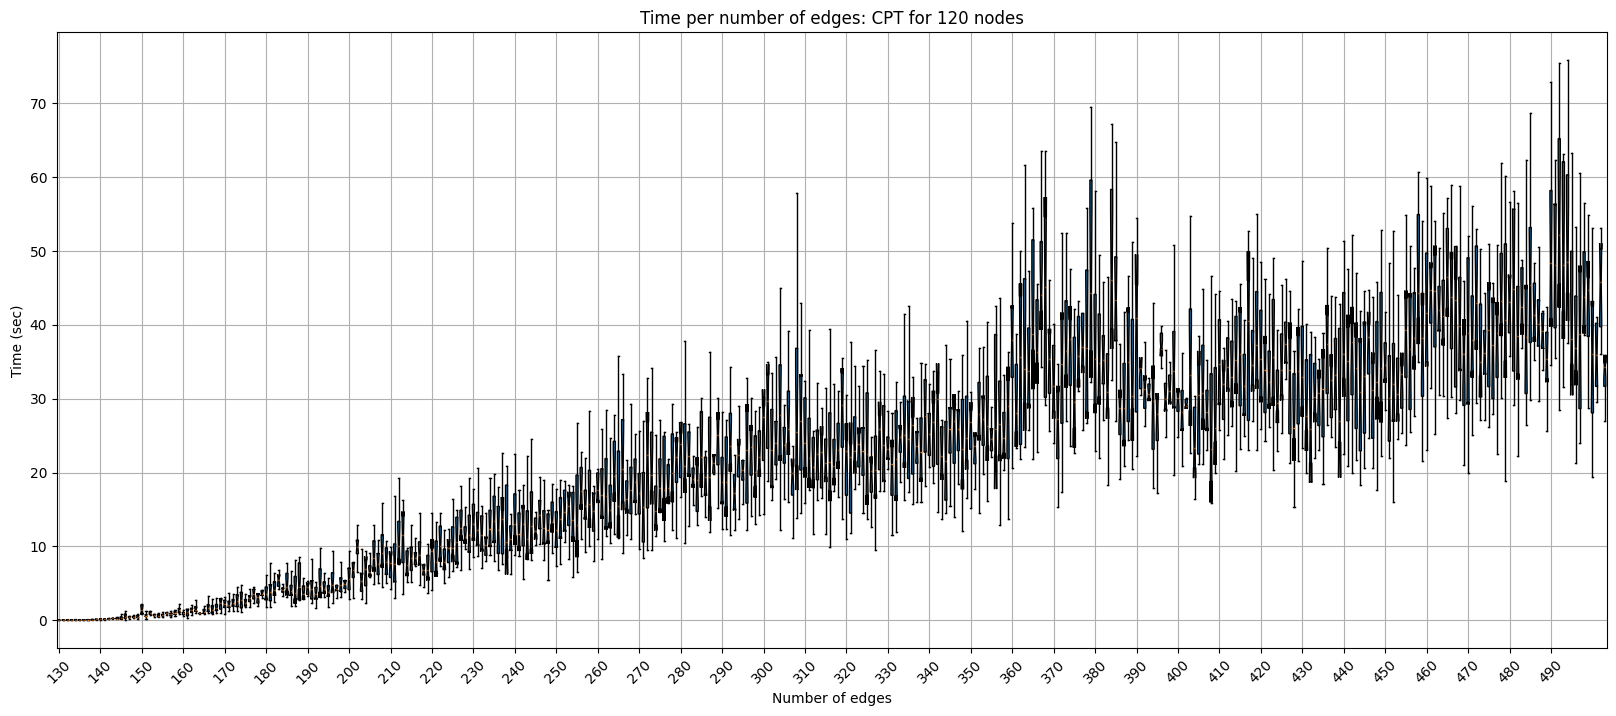

In [58]:

vertices = np.arange(130, 500)  

EXPERIMENT_FILE = 'experiments/cpt_2_11_05_2024'
with open(f"{EXPERIMENT_FILE}.json", 'r') as json_file:
    data = json.load(json_file)

EXPERIMENT_FILE = 'experiments/cpt_3_12_05_2024'
with open(f"{EXPERIMENT_FILE}.json", 'r') as json_file:
    data.update(json.load(json_file))

print(data)
execution_times = np.array([[float(val) if float(val) <80
                             else np.mean([float(v) for v in value if float(v) <120]) 
                             for val in value][:10] for value in data.values()])

# Tworzenie wykresu pudełkowego
plt.figure(figsize=(20, 8))  # Zwiększono rozmiar dla lepszej czytelności
plt.boxplot(execution_times.T, notch=True, patch_artist=True, showfliers=False)

# Ustawienie etykiet na osi X tylko dla co dziesiątego eksperymentu
plt.xticks(ticks=np.arange(1, len(vertices)+1, 10), labels=vertices[::10], rotation=45)
plt.title('Time per number of edges: CPT for 120 nodes')
plt.xlabel('Number of edges')
plt.ylabel('Time (sec)')
plt.grid(True)
plt.show()

{'(30, 300)': ['0.072', '0.052', '0.075', '0.031', '0.057', '0.093', '0.029', '0.034', '0.067', '0.062', '0.054', '0.055', '0.036', '0.045', '0.054', '0.036', '0.023', '0.034', '0.048', '0.031', '0.037', '0.032', '0.110', '0.068', '0.057', '0.051', '0.047', '0.064', '0.057', '0.041', '0.052', '0.044', '0.072', '0.030', '0.066', '0.049', '0.057', '0.080', '0.049', '0.041', '0.031', '0.040', '0.019', '0.112', '0.031', '0.045', '0.062', '0.056', '0.057', '0.070', '0.037', '0.043', '0.027', '0.040', '0.054', '0.056', '0.088', '0.068', '0.050', '0.034', '0.053', '0.081', '0.053', '0.045', '0.032', '0.048', '0.026', '0.063', '0.058', '0.017', '0.026', '0.051', '0.048', '0.047', '0.036', '0.043', '0.047', '0.045', '0.044', '0.051', '0.056', '0.041', '0.036', '0.029', '0.058', '0.074', '0.026', '0.043', '0.032', '0.032', '0.058', '0.032', '0.048', '0.026', '0.029', '0.042', '0.034', '0.026', '0.047', '0.061'], '(31, 300)': ['0.045', '0.030', '0.062', '0.056', '0.058', '0.045', '0.078', '0.063'

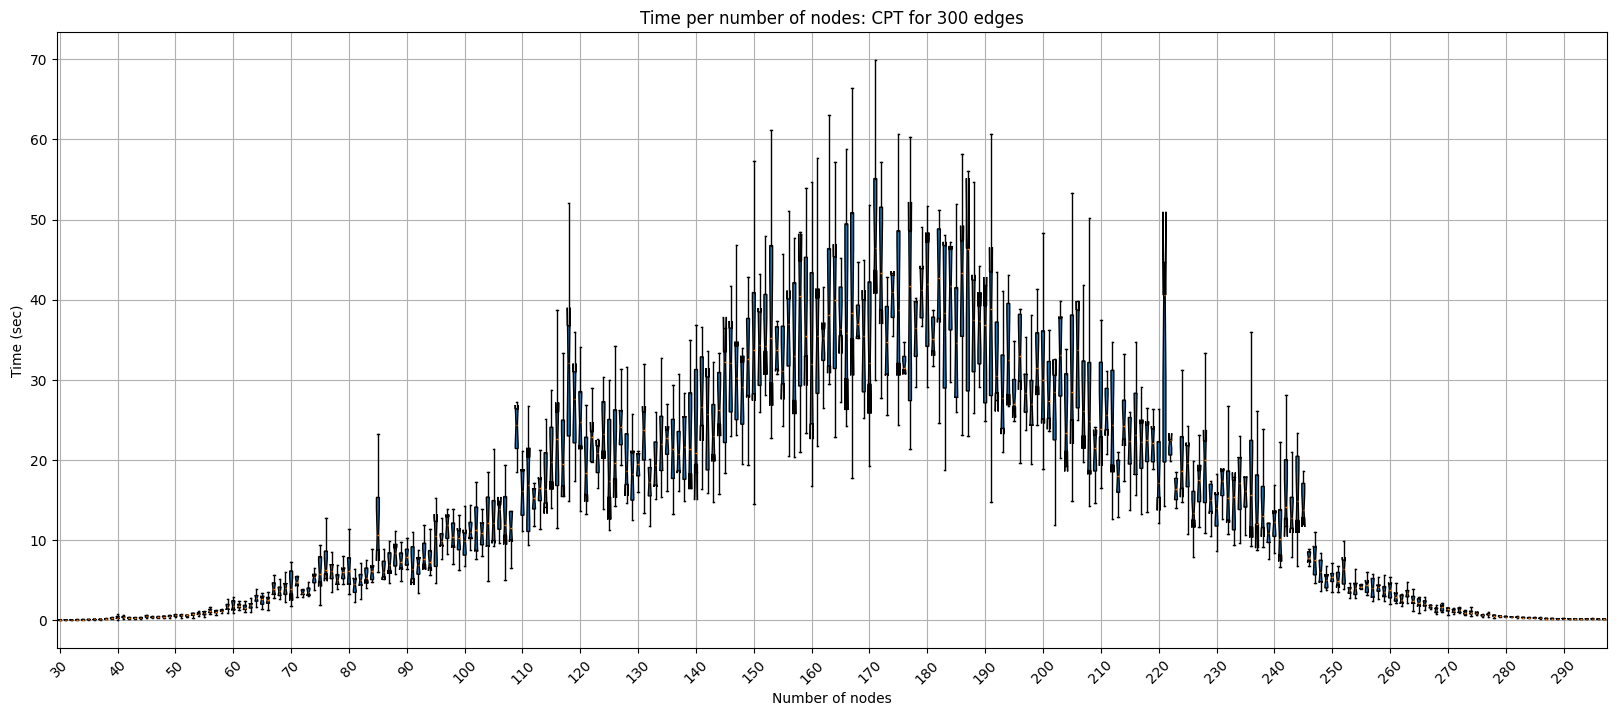

In [94]:

vertices = np.arange(30, 300) 

EXPERIMENT_FILE = 'experiments/cpt_1_06_05_2024'
with open(f"{EXPERIMENT_FILE}.json", 'r') as json_file:
    data = json.load(json_file)

EXPERIMENT_FILE = 'experiments/cpt_4_12_05_2024'
with open(f"{EXPERIMENT_FILE}.json", 'r') as json_file:
    data.update(json.load(json_file))

print(data)
execution_times = np.array([[float(val) if float(val) <80
                             else np.mean([float(v) for v in value if float(v) <120]) 
                             for val in value][:10] for value in data.values()])

# Tworzenie wykresu pudełkowego
plt.figure(figsize=(20, 8))  # Zwiększono rozmiar dla lepszej czytelności
plt.boxplot(execution_times.T, notch=True, patch_artist=True, showfliers=False)

# Ustawienie etykiet na osi X tylko dla co dziesiątego eksperymentu
plt.xticks(ticks=np.arange(1, len(vertices)+1, 10), labels=vertices[::10], rotation=45)
plt.title('Time per number of nodes: CPT for 300 edges')
plt.xlabel('Number of nodes')
plt.ylabel('Time (sec)')
plt.grid(True)
plt.show()

In [90]:

from diblob import DigraphManager


dig = DigraphManager({"B0": {}})
dig.add_nodes('s', 't', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6')
dig.connect_nodes(('s', 'v1'), ('v5', 't'), ('v1', 'v3'), ('v1', 'v4'),
                  ('v2', 'v5'), ('v3', 'v5'), ('v4', 'v5'), ('v5', 'v6'), ('v6', 'v1'), ('v1', 'v2'))


In [91]:
test_cases = generate_test_cases(dig, 
                                source='S', 
                                sink='T', 
                                cost_function={('v5', 'v6'): 10, ('v6', 'v1'): 10}, 
                                additional_edge_cost=100, 
                                default_cost=1,
                                k=1, 
                                delimiter=',')
print(test_cases)

(['s,v1,v4,v5,v6,v1,v2,v5,v6,v1,v3,v5,t'], 48)


In [92]:
test_cases = generate_test_cases(dig, 
                                source='S', 
                                sink='T', 
                                cost_function={('v5', 'v6'): 10, ('v6', 'v1'): 10}, 
                                additional_edge_cost=100, 
                                default_cost=1,
                                k=2, 
                                delimiter=',')
print(test_cases)

(['s,v1,v4,v5,t', 's,v1,v2,v5,v6,v1,v3,v5,t'], 30)


In [93]:
test_cases = generate_test_cases(dig, 
                                source='S', 
                                sink='T', 
                                cost_function={('v5', 'v6'): 10, ('v6', 'v1'): 10}, 
                                additional_edge_cost=100, 
                                default_cost=1,
                                k=3, 
                                delimiter=',')
print(test_cases)

(['s,v1,v4,v5,t', 's,v1,v3,v5,t', 's,v1,v2,v5,v6,v1,v3,v5,t'], 34)
